In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

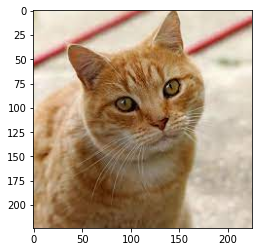

In [4]:
img = cv2.cvtColor(cv2.imread('cat.1.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [5]:
img.shape

(224, 225, 3)

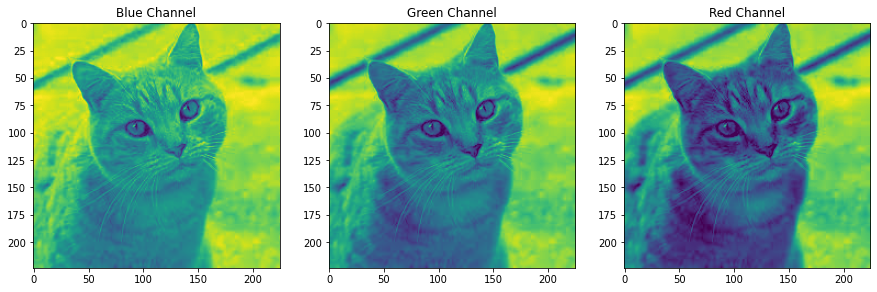

In [6]:
#Splitting into channels
blue,green,red = cv2.split(img)
# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [7]:
blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224
0,216,218,221,226,232,236,240,242,248,248,248,249,249,250,250,249,243,242,242,241,241,240,240,240,244,244,244,244,244,244,244,244,245,245,245,245,245,245,245,245,...,225,225,225,225,225,225,224,225,223,225,225,225,225,226,226,227,227,229,228,229,228,228,224,220,217,218,222,225,229,231,233,239,239,239,239,238,238,237,235,229
1,215,217,221,226,231,236,240,242,247,248,248,248,249,249,250,249,243,242,242,241,241,240,240,240,243,243,243,243,243,243,243,243,244,244,244,244,244,244,244,244,...,225,225,225,225,225,225,225,225,223,225,225,225,225,226,226,227,227,227,228,228,227,228,224,224,222,223,225,228,231,233,235,234,234,235,236,235,236,236,234,229
2,215,217,221,226,231,236,240,242,247,247,248,248,249,249,249,248,243,243,243,242,242,241,241,241,244,244,244,244,244,244,244,244,244,244,244,244,244,244,244,244,...,225,225,225,225,225,225,225,226,226,226,226,227,227,227,227,227,226,226,227,226,226,227,225,231,231,231,232,232,234,234,235,229,230,231,232,233,234,235,237,234
3,214,216,220,225,230,235,239,241,247,247,247,248,248,248,249,248,245,243,243,242,242,241,241,241,243,243,243,243,243,243,243,243,242,242,242,242,242,242,242,242,...,226,226,226,226,226,226,226,227,226,226,226,227,227,227,227,227,227,227,226,226,225,225,226,236,237,236,237,235,235,235,234,229,230,231,232,234,235,237,241,237
4,214,216,220,225,230,235,239,241,246,246,247,247,247,248,248,247,245,243,243,242,242,241,241,241,241,241,241,241,241,241,241,241,240,240,240,240,240,240,240,240,...,227,227,227,227,227,227,227,228,228,228,228,228,228,227,227,227,227,226,226,225,225,223,225,239,240,239,237,236,234,233,231,231,230,232,233,235,237,237,240,235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,176,177,178,180,181,181,181,181,183,180,179,181,182,178,168,160,157,149,140,138,143,149,151,151,139,139,139,139,139,138,136,136,136,133,127,121,116,114,114,115,...,228,227,225,223,221,220,219,217,217,216,216,215,215,215,215,213,211,209,209,210,214,217,220,227,227,226,226,225,225,224,224,218,215,212,209,208,210,212,214,212
220,184,184,184,184,185,187,188,189,189,184,180,179,180,178,171,165,167,159,146,140,139,141,139,137,126,126,128,131,134,138,142,144,140,136,130,124,120,118,118,118,...,225,224,223,222,221,221,220,217,217,217,217,216,216,215,215,214,212,211,210,211,215,219,221,228,228,227,226,224,223,222,222,215,213,211,209,210,213,216,219,214
221,192,191,189,188,189,192,195,197,195,188,180,178,179,179,175,171,169,158,144,137,134,136,133,130,121,121,122,127,132,139,145,148,143,139,133,127,123,121,121,121,...,223,222,222,222,221,221,221,218,218,217,217,217,216,216,216,215,213,212,211,212,216,220,222,230,229,227,226,223,221,220,219,212,211,210,210,212,216,221,223,219
222,195,193,190,188,189,193,197,200,199,190,181,176,178,179,178,175,161,150,138,132,131,133,134,131,128,126,126,127,130,136,141,143,147,141,136,130,125,123,123,123,...,221,221,221,221,222,222,222,218,218,218,217,217,216,216,216,216,214,212,212,213,216,220,223,231,230,228,225,223,220,218,217,210,209,209,210,213,219,224,227,224


In [8]:
df_blue = blue/255
df_green = green/255
df_red = red/255


pca_b = PCA(n_components=25)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=25)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=25)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

In [9]:
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(224, 25)
(224, 25)
(224, 25)


In [10]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.9616425733255036
Green Channel: 0.9715771705051376
Red Channel  : 0.9768246034222942


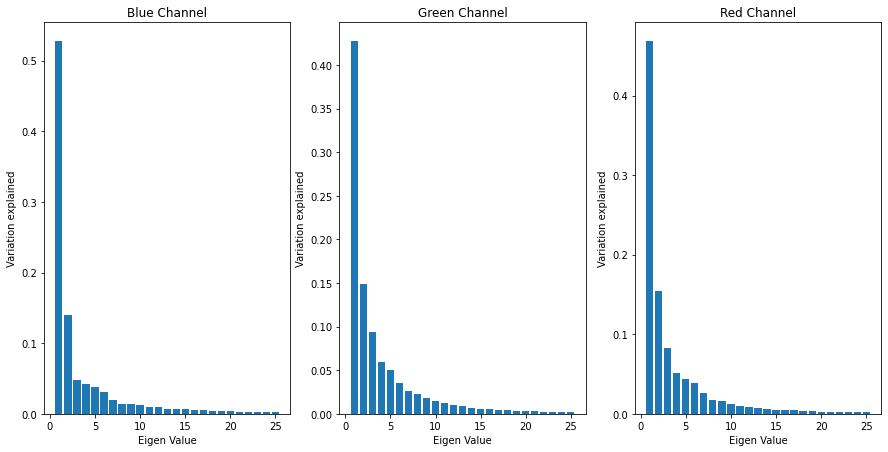

In [11]:
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,26)),pca_b.explained_variance_ratio_)

fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,26)),pca_g.explained_variance_ratio_)

fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,26)),pca_r.explained_variance_ratio_)
plt.show()

In [12]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(224, 225) (224, 225) (224, 225)


In [13]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(224, 225, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


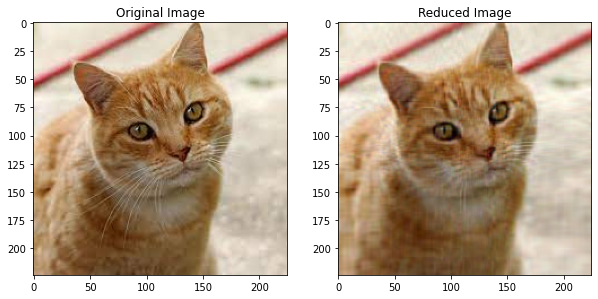

In [14]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()